Saving titanic.csv to titanic (2).csv

 Decision Tree
Accuracy : 0.8044692737430168
Precision: 0.8305084745762712
Recall   : 0.6621621621621622
F1-Score : 0.7368421052631579


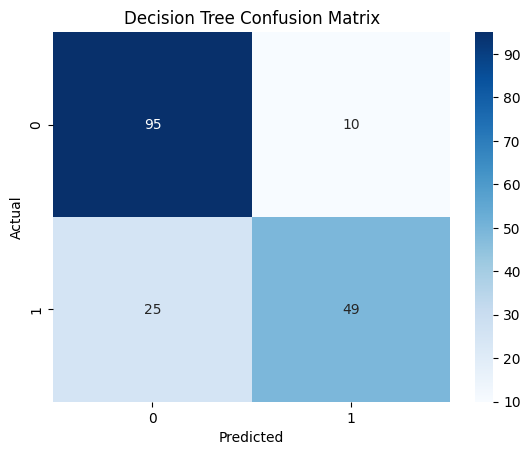


 Naive Bayes
Accuracy : 0.7597765363128491
Precision: 0.7066666666666667
Recall   : 0.7162162162162162
F1-Score : 0.7114093959731543


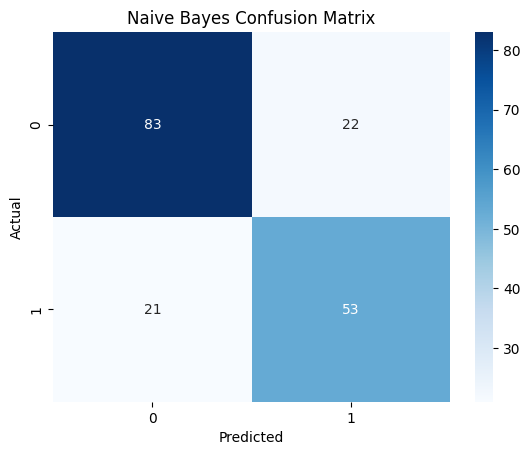


 Support Vector Machine
Accuracy : 0.8044692737430168
Precision: 0.782608695652174
Recall   : 0.7297297297297297
F1-Score : 0.7552447552447552


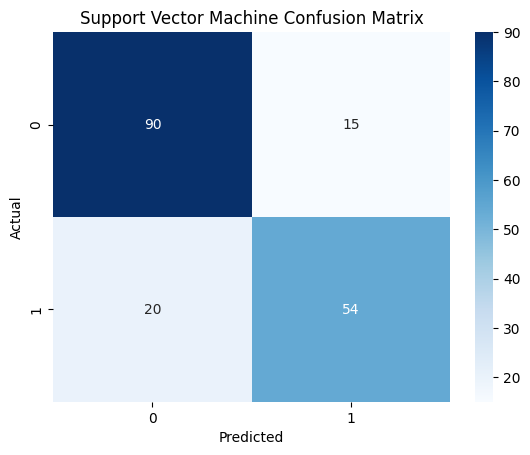


 Bagging Ensemble
Accuracy : 0.7877094972067039
Precision: 0.7647058823529411
Recall   : 0.7027027027027027
F1-Score : 0.7323943661971831


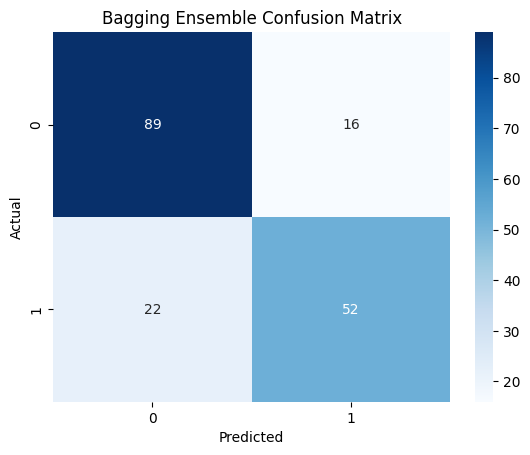

In [4]:
# CSV FILE UPLOAD
from google.colab import files
import pandas as pd

uploaded = files.upload()
data = pd.read_csv(list(uploaded.keys())[0])

# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# FIX COLUMN NAMES
data.columns = data.columns.str.lower()

# SELECT REQUIRED COLUMNS
data = data[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]

# HANDLE MISSING VALUES (STEP 1)
data['age'] = data['age'].fillna(data['age'].mean())
data['fare'] = data['fare'].fillna(data['fare'].mean())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

# ENCODE CATEGORICAL FEATURES
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'s': 0, 'c': 1, 'q': 2})

# FINAL NaN SAFETY CHECK
data = data.fillna(0)

# FEATURES & TARGET
X = data.drop('survived', axis=1)
y = data['survived']

# FEATURE SCALING
scaler = StandardScaler()
X = scaler.fit_transform(X)

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# MODEL TRAINING
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# ENSEMBLE LEARNING (BAGGING)
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)

# EVALUATION FUNCTION
def evaluate_model(model, name):
    y_pred = model.predict(X_test)

    print("\n", name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-Score :", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(name + " Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# RESULTS
evaluate_model(dt, "Decision Tree")
evaluate_model(nb, "Naive Bayes")
evaluate_model(svm, "Support Vector Machine")
evaluate_model(bagging, "Bagging Ensemble")